STAT 453: Deep Learning (Spring 2021)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  

Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat453-ss2021/  
GitHub repository: https://github.com/rasbt/stat453-deep-learning-ss21

---

# MLP with Dropout 

## Imports

In [ ]:
%env CUBLAS_WORKSPACE_CONFIG=:4096:8

env: CUBLAS_WORKSPACE_CONFIG=:4096:8


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples
from helper_dataset import get_dataloaders_mnist

## Settings and Dataset

In [ ]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
print(torch.cuda.is_available())
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.use_deterministic_algorithms(True)

True


In [ ]:
set_all_seeds(RANDOM_SEED)
set_deterministic()

In [ ]:
##########################
### MNIST DATASET
##########################

train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


## Model

In [ ]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, num_features, num_classes, drop_proba1,drop_proba2,drop_proba3,
                 num_hidden_1, num_hidden_2):
        super().__init__()
        
        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Dropout(drop_proba2),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            torch.nn.Dropout(drop_proba2),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            torch.nn.Dropout(drop_proba3),
            # output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )
           
    def forward(self, x):
        logits = self.my_network(x)
        return logits

## Without Dropout

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.3135
Epoch: 001/050 | Batch 0050/0210 | Loss: 2.0449
Epoch: 001/050 | Batch 0100/0210 | Loss: 1.4922
Epoch: 001/050 | Batch 0150/0210 | Loss: 1.2252
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.9728
Epoch: 001/050 | Train: 82.89% | Validation: 86.20%
Time elapsed: 0.25 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.9948
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.8759
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.7411
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.7336
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.7581
Epoch: 002/050 | Train: 88.19% | Validation: 90.58%
Time elapsed: 0.40 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.7020
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.6740
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.6508
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.5888
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.7405
Epoch: 003/050 | Train: 89.93% | Validation: 91.98%
Time elapsed: 0.55 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.6912
Epoch: 

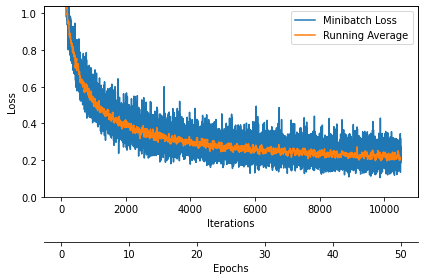

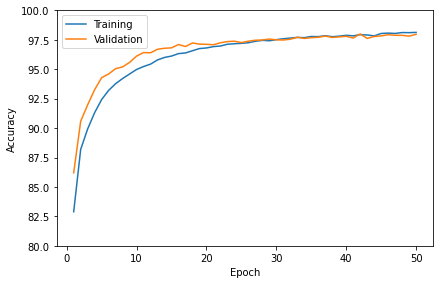

In [ ]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden_1=NUM_HIDDEN_1,
                             num_hidden_2=NUM_HIDDEN_2,
                             drop_proba1=0.2,drop_proba2=0.2,drop_proba3=0.6,
                             num_classes=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)

plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)

plt.ylim([80, 100])
plt.show()